# The Greeen House Gas and CO2 Data
### CSV file downloaded from Kaggle User Yoann Boyere. Data orginal sourced from OurWorldInData (https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions).

This data seemed interesting and pretained somewhat to my undergrad studies, so sparked my interest. Generally the data contained data on x countries, giving datapoints of annual CO2 emissions (tonnes). 

## Packages ##
Here are the packages I will use: 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](http://pandas.pydata.org/) Python data analysis library
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.

In [2]:
import pandas as pd
import numpy as np

import sys

import matplotlib.pyplot as plt
%matplotlib inline


<font size="4">Below is the head() and shape of the data, as you can see there are four columns and 20853 entries:</font>


In [3]:
start_df = pd.read_csv(r"co2_emission.csv")
start_df.head()
 

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [4]:
start_df.shape

(20853, 4)

# Part 1 - Graphing this data
<font size="4">Here I aim to show the general trends of this data by simply plotting the co2_emissions of some of the countries.</font>


In [5]:
  
countries = start_df['Entity'].unique()
num_count = len(countries)

In [6]:
start_df.nlargest(10, ['Annual CO₂ emissions (tonnes )']) 

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20619,World,OWID_WRL,2017,3.615326e+10
20618,World,OWID_WRL,2016,3.567510e+10
20616,World,OWID_WRL,2014,3.550583e+10
20617,World,OWID_WRL,2015,3.546275e+10
20615,World,OWID_WRL,2013,3.520789e+10
20614,World,OWID_WRL,2012,3.491929e+10
20613,World,OWID_WRL,2011,3.435737e+10
20612,World,OWID_WRL,2010,3.306665e+10
20610,World,OWID_WRL,2008,3.187576e+10
20611,World,OWID_WRL,2009,3.152314e+10


<font size="4"> As you can see this dataset includes the world total co2 emissions. As I want to compare the co2 emission rate per country we need to remove these aswell as some other "Entities" as you can seee below.</font>

In [7]:
start_df = start_df[start_df.Entity != "World"]
start_df =start_df[start_df.Entity != "Statistical differences"]
start_df =start_df[start_df.Entity != "International transport"]

In [8]:
 

countries_df = start_df.groupby(['Entity', 'Year']).sum()
countries_df.head()

Annual CO₂ emissions (tonnes )
Entity      Year                                
Afghanistan 1949                         14656.0
            1950                         84272.0
            1951                         91600.0
            1952                         91600.0
            1953                        106256.0

In [9]:
years_df = start_df.groupby(['Year']).size()

In [10]:
print(start_df.nlargest(10, ['Annual CO₂ emissions (tonnes )']))


     Entity Code  Year  Annual CO₂ emissions (tonnes )
4484  China  CHN  2017                    9.838754e+09
4481  China  CHN  2014                    9.820360e+09
4480  China  CHN  2013                    9.796527e+09
4482  China  CHN  2015                    9.716468e+09
4483  China  CHN  2016                    9.704479e+09
4479  China  CHN  2012                    9.633899e+09
4478  China  CHN  2011                    9.388199e+09
4477  China  CHN  2010                    8.500543e+09
4476  China  CHN  2009                    7.758812e+09
4475  China  CHN  2008                    7.375190e+09


In [11]:
start_df.sort_values(by=['Annual CO₂ emissions (tonnes )'])

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
12736,Moldova,MDA,1959,0.000000e+00
2160,Barbados,BRB,1941,0.000000e+00
2161,Barbados,BRB,1942,0.000000e+00
2162,Barbados,BRB,1943,0.000000e+00
2163,Barbados,BRB,1944,0.000000e+00
...,...,...,...,...
4483,China,CHN,2016,9.704479e+09
4482,China,CHN,2015,9.716468e+09
4480,China,CHN,2013,9.796527e+09
4481,China,CHN,2014,9.820360e+09


In [12]:
(start_df.sort_values(['Annual CO₂ emissions (tonnes )'])
 .drop_duplicates(['Entity']).reset_index( ))

,index,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,12736,Moldova,MDA,1959,0.000000e+00
1,2160,Barbados,BRB,1941,0.000000e+00
2,6692,Europe (other),NaN,1834,0.000000e+00
3,19685,United States,USA,1775,0.000000e+00
4,18736,Trinidad and Tobago,TTO,1908,0.000000e+00
...,...,...,...,...,...
225,20014,Uzbekistan,UZB,1959,4.596176e+07
226,5154,Czech Republic,CZE,1959,9.287178e+07
227,10744,Kazakhstan,KAZ,1999,1.073230e+08
228,19334,Ukraine,UKR,2017,2.121163e+08


In [13]:
start_df.sort_values('Annual CO₂ emissions (tonnes )', ascending=False).drop_duplicates(['Entity']).dropna(how='any')
start1_df = start_df.drop(['Code'], axis=1)

In [14]:
us_df = start1_df[start1_df.Entity == "United States"].dropna(how='any')
china_df = start1_df[start1_df.Entity == "China"].dropna(how='any')
russia_df = start1_df[start1_df.Entity == "Russia"].dropna(how='any')
india_df = start1_df[start1_df.Entity == "India"].dropna(how='any')
japan_df = start1_df[start1_df.Entity == "Japan"].dropna(how='any')
#sort_values('Annual CO₂ emissions (tonnes )')
#order_df['Entity'] == "United States"

In [15]:
import matplotlib.patches as mpatches

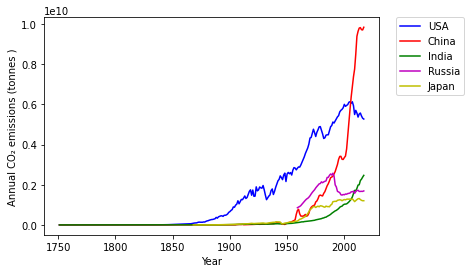

In [16]:
ax = plt.gca()
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (tonnes )')
ax.plot(us_df['Year'], us_df['Annual CO₂ emissions (tonnes )'], color="b", label="USA")
ax.plot(china_df['Year'], china_df['Annual CO₂ emissions (tonnes )'], color="r", label = "China")
ax.plot(india_df['Year'], india_df['Annual CO₂ emissions (tonnes )'], color="g", label = "India")
ax.plot(russia_df['Year'], russia_df['Annual CO₂ emissions (tonnes )'], color="m", label = "Russia")
ax.plot(japan_df['Year'], japan_df['Annual CO₂ emissions (tonnes )'], color="y" , label = "Japan")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


#us_df['Annual CO₂ emissions (tonnes )']

In [17]:

us_df

,Entity,Year,Annual CO₂ emissions (tonnes )
19661,United States,1751,0.000000e+00
19662,United States,1752,0.000000e+00
19663,United States,1753,0.000000e+00
19664,United States,1754,0.000000e+00
19665,United States,1755,0.000000e+00
...,...,...,...
19923,United States,2013,5.519613e+09
19924,United States,2014,5.568759e+09
19925,United States,2015,5.420804e+09
19926,United States,2016,5.310861e+09


# Part 2 -  The introduction of the popultation data set.
.csv downloaded locally from - https://data.worldbank.org/indicator/SP.POP.TOTL
### Here I searched for a reasonably complete dataset of population/ population density  
### I  found this from the world bank website.
### Here I will try to find the 

In [18]:
pop_df = pd.read_csv(r"population.csv")
pop_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [19]:
pop1_df = pop_df.drop(['LocID', 'VarID', 'Variant','MidPeriod', 'PopMale', 'PopFemale'], axis=1)
pop1_df.head()

,Location,Time,PopTotal,PopDensity
0,Afghanistan,1950,7752.117,11.874
1,Afghanistan,1951,7840.151,12.009
2,Afghanistan,1952,7935.996,12.156
3,Afghanistan,1953,8039.684,12.315
4,Afghanistan,1954,8151.316,12.486


In [20]:
countpop_df = pop1_df.groupby(['Location', 'Time']).sum()
countpop_df.head()

PopTotal  PopDensity
Location    Time                      
Afghanistan 1950  7752.117      11.874
            1951  7840.151      12.009
            1952  7935.996      12.156
            1953  8039.684      12.315
            1954  8151.316      12.486

In [21]:
us_pop_df = pop1_df[pop1_df.Location == "United States of America"].dropna(how='any')
china_pop_df = pop1_df[pop1_df.Location == "China"].dropna(how='any')
print(china_pop_df)

      Location  Time     PopTotal  PopDensity
47824    China  1950   554419.269      59.055
47825    China  1951   569909.108      60.705
47826    China  1952   582576.497      62.054
47827    China  1953   593365.882      63.203
47828    China  1954   603052.316      64.235
...        ...   ...          ...         ...
48703    China  2080  1005477.971     107.100
48704    China  2085   955037.366     101.727
48705    China  2090   907470.627      96.661
48706    China  2095   863197.735      91.945
48707    China  2100   820154.565      87.360

[884 rows x 4 columns]


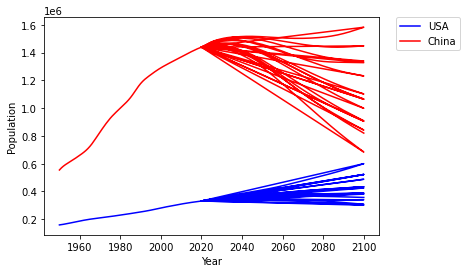

In [22]:
gr = plt.gca()
plt.xlabel('Year')
plt.ylabel('Population')
gr.plot(us_pop_df['Time'], us_pop_df['PopTotal'], color="b", label = "USA")
gr.plot(china_pop_df['Time'], china_pop_df['PopTotal'], color="r", label= "China")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Above the population values also include the projected values (from different groups/models) in the next step I remove these values to see actual population values.

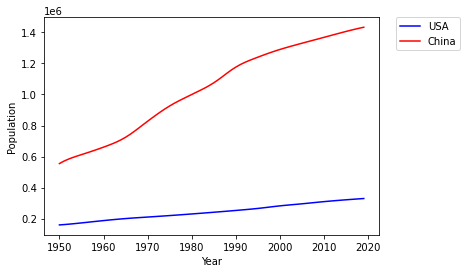

In [23]:
gra = plt.gca()
plt.xlabel('Year')
plt.ylabel('Population')
gra.plot(us_pop_df.iloc[:70]['Time'], us_pop_df.iloc[:70]['PopTotal'], color="b", label = "USA")
gra.plot(china_pop_df.iloc[:70]['Time'], china_pop_df.iloc[:70]['PopTotal'], color="r", label = "China")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Part 3 - The Covariance
### Here I will try to find the covariance between population/population density and the CO2 emission. I will do this for each country. 
### This could possibly enlighten us to why certain countries pollute more than others, i.e. which countries produce more CO2 inherintly due to the amount of people that live there.


<font size="4">First we have to clean the data to remove empty/predictive columns and to allign the two dataframes.</font>

In [24]:
us_pop_df.iloc[:67].head()

,Location,Time,PopTotal,PopDensity
264221,United States of America,1950,158804.397,17.361
264222,United States of America,1951,160872.264,17.587
264223,United States of America,1952,163266.026,17.848
264224,United States of America,1953,165909.996,18.137
264225,United States of America,1954,168736.390,18.446


In [25]:
print(us_df.iloc[-68:-1])

              Entity  Year  Annual CO₂ emissions (tonnes )
19860  United States  1950                    2.535942e+09
19861  United States  1951                    2.612370e+09
19862  United States  1952                    2.545080e+09
19863  United States  1953                    2.605745e+09
19864  United States  1954                    2.483052e+09
...              ...   ...                             ...
19922  United States  2012                    5.366730e+09
19923  United States  2013                    5.519613e+09
19924  United States  2014                    5.568759e+09
19925  United States  2015                    5.420804e+09
19926  United States  2016                    5.310861e+09

[67 rows x 3 columns]


<font size="4"> Here the cells in the population dataset is filled from 1950 to 2016. Hence the co2_emissions is trimmed upto this point.</font>

In [26]:
left =us_df.iloc[-68:-1]
right = us_pop_df.iloc[:67].rename(columns={"Location": "Entity", "Time": "Year"})
left.reset_index(drop=True, inplace=True) 
right.reset_index(drop=True, inplace=True) 

right.head()

,Entity,Year,PopTotal,PopDensity
0,United States of America,1950,158804.397,17.361
1,United States of America,1951,160872.264,17.587
2,United States of America,1952,163266.026,17.848
3,United States of America,1953,165909.996,18.137
4,United States of America,1954,168736.390,18.446


In [27]:
left.head()

,Entity,Year,Annual CO₂ emissions (tonnes )
0,United States,1950,2.535942e+09
1,United States,1951,2.612370e+09
2,United States,1952,2.545080e+09
3,United States,1953,2.605745e+09
4,United States,1954,2.483052e+09


In [28]:
us_resultpd= pd.concat([left, right.PopTotal], axis=1)
us_result1pd = pd.concat([us_resultpd, right.PopDensity], axis=1)
us_result1pd.head()

,Entity,Year,Annual CO₂ emissions (tonnes ),PopTotal,PopDensity
0,United States,1950,2.535942e+09,158804.397,17.361
1,United States,1951,2.612370e+09,160872.264,17.587
2,United States,1952,2.545080e+09,163266.026,17.848
3,United States,1953,2.605745e+09,165909.996,18.137
4,United States,1954,2.483052e+09,168736.390,18.446


In [29]:
left_china =china_df.iloc[-68:-1]
right_china = china_pop_df.iloc[:67].rename(columns={"Location": "Entity", "Time": "Year"})
left_china.reset_index(drop=True, inplace=True) 
right_china.reset_index(drop=True, inplace=True) 

print(right_china)

   Entity  Year     PopTotal  PopDensity
0   China  1950   554419.269      59.055
1   China  1951   569909.108      60.705
2   China  1952   582576.497      62.054
3   China  1953   593365.882      63.203
4   China  1954   603052.316      64.235
..    ...   ...          ...         ...
62  China  2012  1384206.408     147.441
63  China  2013  1391883.335     148.259
64  China  2014  1399453.966     149.065
65  China  2015  1406847.868     149.853
66  China  2016  1414049.353     150.620

[67 rows x 4 columns]


In [30]:
china_resultpd= pd.concat([left_china, right_china.PopTotal], axis=1)
china_result1pd = pd.concat([china_resultpd, right_china.PopDensity], axis=1)
china_result1pd.head()

,Entity,Year,Annual CO₂ emissions (tonnes ),PopTotal,PopDensity
0,China,1950,78647760.0,554419.269,59.055
1,China,1951,101723632.0,569909.108,60.705
2,China,1952,128221680.0,582576.497,62.054
3,China,1953,134102400.0,593365.882,63.203
4,China,1954,161256304.0,603052.316,64.235


### Here I use the .cov() function (built into python) to identify a correlation trends, between population and pollution.

In [31]:
usresultpd = us_result1pd.drop(['Year'], axis=1) 
usresultpd.cov()

,Annual CO₂ emissions (tonnes ),PopTotal,PopDensity
Annual CO₂ emissions (tonnes ),1.320892e+18,5.056296e+13,5.527559e+09
PopTotal,5.056296e+13,2.265366e+09,2.476511e+05
PopDensity,5.527559e+09,2.476511e+05,2.707336e+01


### I calculated the same values for China.

In [32]:
chinaresultpd = china_result1pd.drop(['Year'], axis=1) 
chinaresultpd.cov()

,Annual CO₂ emissions (tonnes ),PopTotal,PopDensity
Annual CO₂ emissions (tonnes ),8.604009e+18,6.883388e+14,7.331973e+10
PopTotal,6.883388e+14,7.875489e+10,8.388720e+06
PopDensity,7.331973e+10,8.388720e+06,8.935397e+02


<font size="4"> Here you can also see that the USA has a lower correlation between the population and pollution, in comparison to the same values for China. (cov of ~5.5e+9 vs cov of 7.3e+10)
</font>

 

<font size = "4"> Therefore it would be reasonable to assume that the US's pollution rate relies less on population dynamics as a leading cause of CO2 emission. Or at the very least there must be other factors that are more heavily involved in the USA's pollution rate, than that of China's.</font>

# Part 4 - Introducing Literacy Rate

<font size="4"> I began to look for another major factor that could impact the co2 emission, this lead me to the dataset from (https://data.worldbank.org/indicator/SE.ADT.LITR.ZS?end=2019&name_desc=false&start=1970)</font>

<font size="4"> My reasoning for this area of investigation was that there could possibly be a link between the literacy (as a crude measure of education levels) of a countries population and the amount that the citizens of that state pollute.
With this hypothesis I began my work.</font>

In [33]:
lit_rate = pd.read_csv(r"literacy_rate.csv")

In [34]:
lit_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.82264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.80742,NaN
1,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31.74112,NaN,NaN,NaN,NaN,NaN,NaN,43.01972,NaN
2,Angola,AGO,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.03011,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.84530,97.24697,NaN,NaN,NaN,NaN,NaN,98.14115,NaN
4,Andorra,AND,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
lit1_rate = lit_rate.drop(["Indicator Name", "Indicator Code", "Country Code"], axis = 1)
lit1_rate.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.82264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.80742,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31.74112,NaN,NaN,NaN,NaN,NaN,NaN,43.01972,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.03011,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.84530,97.24697,NaN,NaN,NaN,NaN,NaN,98.14115,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
lit1_rate = lit1_rate.iloc[1:]

In [37]:

China_litrate = lit1_rate[lit1_rate['Country Name'] == "China"]

In [38]:
China_litrate

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
38,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.12448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.84089,NaN


In [39]:
US_litrate = lit1_rate[lit1_rate['Country Name'] == "United States"]

In [40]:
US_litrate

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
249,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size = "4"> Here the dataset too incomplete to do anything valuable with.</font> 

## With that this project came to an end.